<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#Tarea 1.
df = pd.read_csv('boston_housing.csv')

print(df.head())

print(df.info())

print(df.describe())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 no

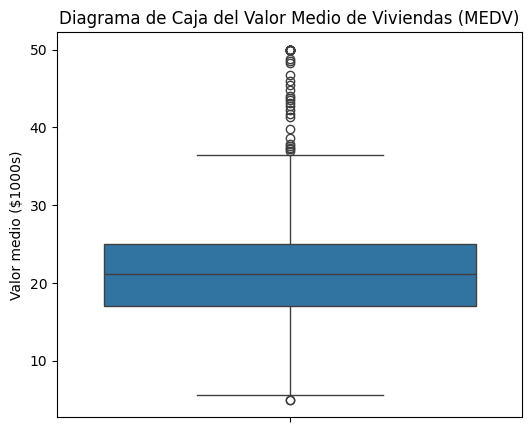

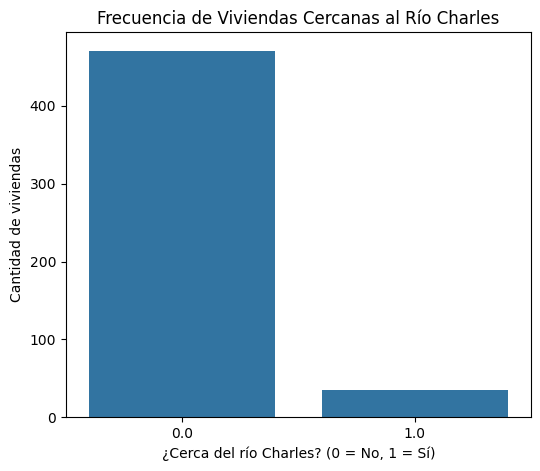

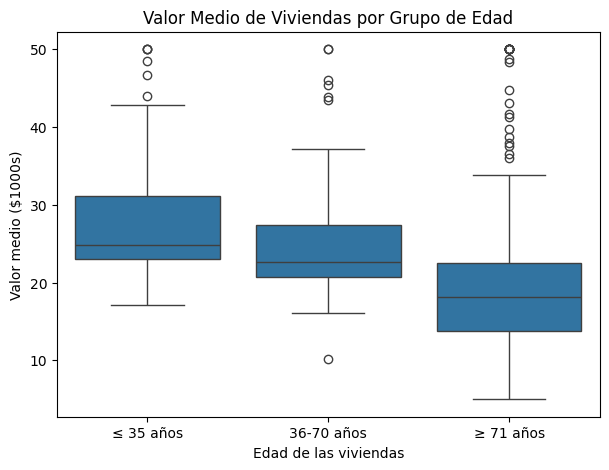

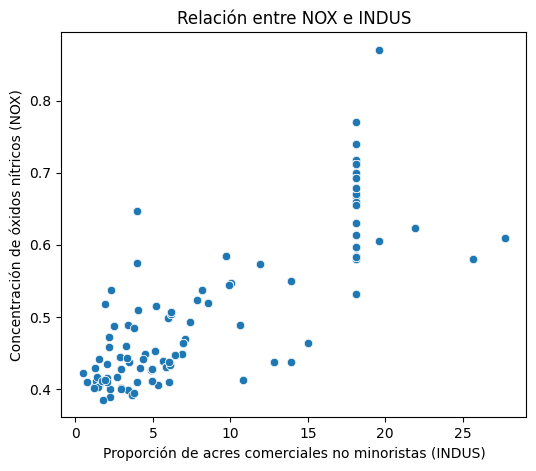

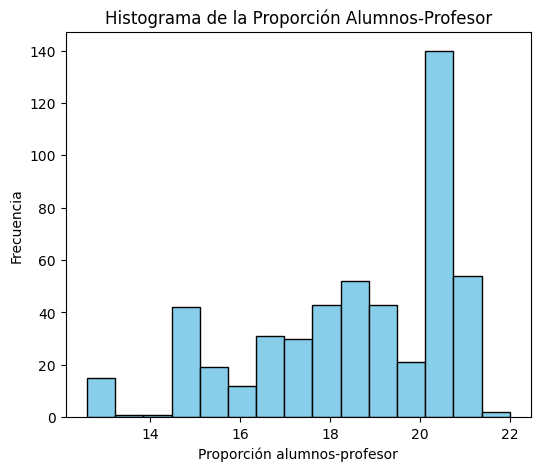

In [21]:
#Tarea 2.

plt.figure(figsize=(6, 5))
sns.boxplot(y='MEDV', data=df)
plt.title('Diagrama de Caja del Valor Medio de Viviendas (MEDV)')
plt.ylabel('Valor medio ($1000s)')
plt.show()

plt.figure(figsize=(6, 5))
sns.countplot(x='CHAS', data=df)
plt.title('Frecuencia de Viviendas Cercanas al Río Charles')
plt.xlabel('¿Cerca del río Charles? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de viviendas')
plt.show()

bins = [0, 35, 70, 100]
labels = ['≤ 35 años', '36-70 años', '≥ 71 años']
df['GrupoEdad'] = pd.cut(df['AGE'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(7, 5))
sns.boxplot(x='GrupoEdad', y='MEDV', data=df)
plt.title('Valor Medio de Viviendas por Grupo de Edad')
plt.xlabel('Edad de las viviendas')
plt.ylabel('Valor medio ($1000s)')
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Relación entre NOX e INDUS')
plt.xlabel('Proporción de acres comerciales no minoristas (INDUS)')
plt.ylabel('Concentración de óxidos nítricos (NOX)')
plt.show()

plt.figure(figsize=(6, 5))
plt.hist(df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de la Proporción Alumnos-Profesor')
plt.xlabel('Proporción alumnos-profesor')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
#Tarea 3.
medv_chas0 = df[df['CHAS'] == 0]['MEDV']
medv_chas1 = df[df['CHAS'] == 1]['MEDV']

t_stat, p_val = stats.ttest_ind(medv_chas0, medv_chas1)

print("Prueba T:")
print("Hipótesis nula: No hay diferencia en MEDV según CHAS.")
print(f"Estadístico t = {t_stat:.4f}, p-valor = {p_val:.4f}")
print("Conclusión:", "Se rechaza H0" if p_val < 0.05 else "No se puede rechazar H0")
print()

df['GrupoEdad'] = pd.cut(df['AGE'], bins=bins, labels=labels, include_lowest=True)

modelo_anova = smf.ols('MEDV ~ C(GrupoEdad)', data=df).fit()
anova_resultado = sm.stats.anova_lm(modelo_anova, typ=2)

print("ANOVA:")
print("Hipótesis nula: No hay diferencia significativa en MEDV entre los grupos de edad.")
print(anova_resultado)
print("Conclusión:", "Se rechaza H0" if anova_resultado['PR(>F)'].iloc[0] < 0.05 else "No se puede rechazar H0")
print()

r, p_corr = stats.pearsonr(df['NOX'], df['INDUS'])

print("Correlación de Pearson:")
print("Hipótesis nula: NO hay correlación entre NOX e INDUS.")
print(f"Coeficiente de correlación r = {r:.4f}, p-valor = {p_corr:.4f}")
print("Conclusión:", "Se rechaza H0" if p_corr < 0.05 else "No se puede rechazar H0")
print()

modelo = smf.ols('MEDV ~ DIS', data=df).fit()

print("Regresión lineal (DIS → MEDV):")
print("Hipótesis nula: DIS no tiene efecto sobre MEDV.")
print(modelo.summary())
print("Conclusión:", "DIS tiene un efecto significativo" if modelo.pvalues['DIS'] < 0.05 else "DIS no tiene un efecto significativo")

Prueba T:
Hipótesis nula: No hay diferencia en MEDV según CHAS.
Estadístico t = -3.9964, p-valor = 0.0001
Conclusión: Se rechaza H0

ANOVA:
Hipótesis nula: No hay diferencia significativa en MEDV entre los grupos de edad.
                    sum_sq     df         F        PR(>F)
C(GrupoEdad)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusión: Se rechaza H0

Correlación de Pearson:
Hipótesis nula: NO hay correlación entre NOX e INDUS.
Coeficiente de correlación r = 0.7637, p-valor = 0.0000
Conclusión: Se rechaza H0

Regresión lineal (DIS → MEDV):
Hipótesis nula: DIS no tiene efecto sobre MEDV.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                